In [29]:
# aqui sera la serie de tiempo de Precios en ciudad capital de gasolina super servicio completo. 


# los datos a usar están en la carpeta Datos_precio 

In [30]:
import pandas as pd

# funcion para procesar los libros de excel
def load_year_data(year, table_header_start, last_row):
    df = pd.read_excel('Datos_precios/Precios-Promedio-Nacionales-Diarios-2025-1.xlsx',
                       sheet_name=str(year),
                       header= table_header_start,
                       usecols=['FECHA', 'Superior'])
    
    # todos los archivos tienen una linea extra entre el encabezado y los datos
    df = df.iloc[1:last_row]
    
    # Convertir fecha y asegurar formato correcto
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df['Superior'] = pd.to_numeric(df['Superior'], errors='coerce')
    
    return df

df_2021 = load_year_data("2021", 6, 366)
df_2022 = load_year_data("2022", 6, 366)
df_2023 = load_year_data("2023", 7, 366)
df_2024 = load_year_data("2024", 7, 367)
df_2025 = load_year_data("2025", 7, 195)

df_2021


# 2022

,FECHA,Superior
1,2021-01-01,21.91
2,2021-01-02,21.91
3,2021-01-03,21.91
4,2021-01-04,21.91
5,2021-01-05,21.91
...,...,...
361,2021-12-27,28.69
362,2021-12-28,28.69
363,2021-12-29,28.69
364,2021-12-30,28.69


In [31]:
df_2022


,FECHA,Superior
1,2022-01-01,28.69
2,2022-01-02,28.69
3,2022-01-03,28.79
4,2022-01-04,28.79
5,2022-01-05,28.79
...,...,...
361,2022-12-27,32.55
362,2022-12-28,32.55
363,2022-12-29,32.55
364,2022-12-30,32.55


In [32]:
df_2023

,FECHA,Superior
1,2023-01-01,32.55
2,2023-01-02,32.55
3,2023-01-03,32.56
4,2023-01-04,32.56
5,2023-01-05,32.56
...,...,...
361,2023-12-27,30.44
362,2023-12-28,30.44
363,2023-12-29,30.44
364,2023-12-30,30.44


In [33]:

df_2024

,FECHA,Superior
1,2024-01-01,30.44
2,2024-01-02,30.44
3,2024-01-03,30.47
4,2024-01-04,30.47
5,2024-01-05,30.47
...,...,...
362,2024-12-27,28.99
363,2024-12-28,28.99
364,2024-12-29,28.99
365,2024-12-30,28.95


In [34]:
df_2025

,FECHA,Superior
1,2025-01-01,28.95
2,2025-01-02,28.95
3,2025-01-03,28.95
4,2025-01-04,28.95
5,2025-01-05,28.95
...,...,...
190,2025-07-09,30.98
191,2025-07-10,30.98
192,2025-07-11,30.98
193,2025-07-12,30.98


## Ahora que ya se tienen los datos de los años de 2021 a 2025. Es necesario juntarlos

In [35]:
# Combinar todos los DataFrames en uno solo
df_completo = pd.concat([df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# Ordenar por fecha
df_completo = df_completo.sort_values('FECHA').reset_index(drop=True)

# Verificar el resultado
print("Primeras filas:")
print(df_completo.head())
print("\nÚltimas filas:")
print(df_completo.tail())
print(f"\nRango de fechas: {df_completo['FECHA'].min()} a {df_completo['FECHA'].max()}")
print(f"Total de registros: {len(df_completo)}")

Primeras filas:
       FECHA  Superior
0 2021-01-01     21.91
1 2021-01-02     21.91
2 2021-01-03     21.91
3 2021-01-04     21.91
4 2021-01-05     21.91

Últimas filas:
          FECHA  Superior
1650 2025-07-09     30.98
1651 2025-07-10     30.98
1652 2025-07-11     30.98
1653 2025-07-12     30.98
1654 2025-07-13     30.98

Rango de fechas: 2021-01-01 00:00:00 a 2025-07-13 00:00:00
Total de registros: 1655


# Analisis exploratorio del set completo

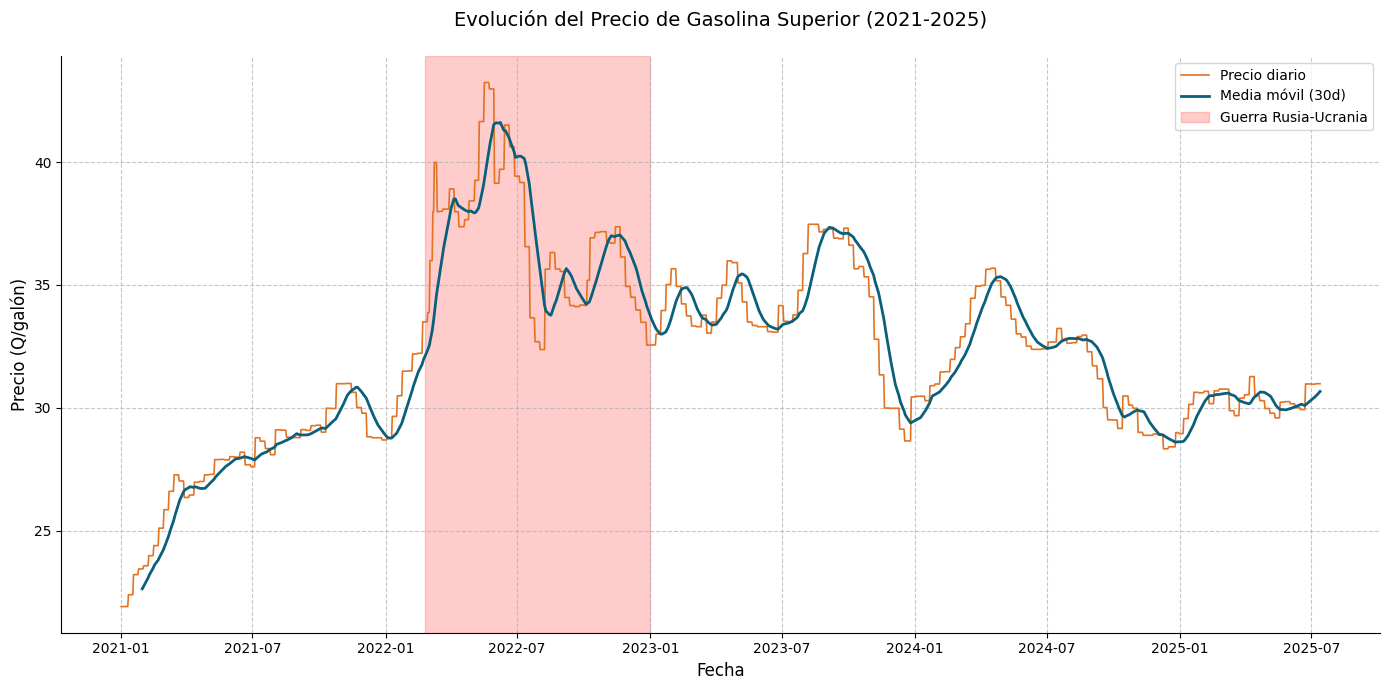

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(14, 7))

# Opción 1: Línea simple
plt.plot(df_completo['FECHA'], df_completo['Superior'], 
         color='#E37222', linewidth=1.2, label='Precio diario')

# Opción 2: Promedio móvil (suaviza la serie)
window_size = 30  # Promedio de 30 días
plt.plot(df_completo['FECHA'], df_completo['Superior'].rolling(window_size).mean(), 
         color='#0A5F7A', linewidth=2, label=f'Media móvil ({window_size}d)')

# Destacar eventos importantes
plt.axvspan(pd.to_datetime('2022-02-24'), pd.to_datetime('2022-12-31'), 
            alpha=0.2, color='red', label='Guerra Rusia-Ucrania')

plt.title('Evolución del Precio de Gasolina Superior (2021-2025)\n', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (Q/galón)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

## Gráfico de la serie y sus componentes

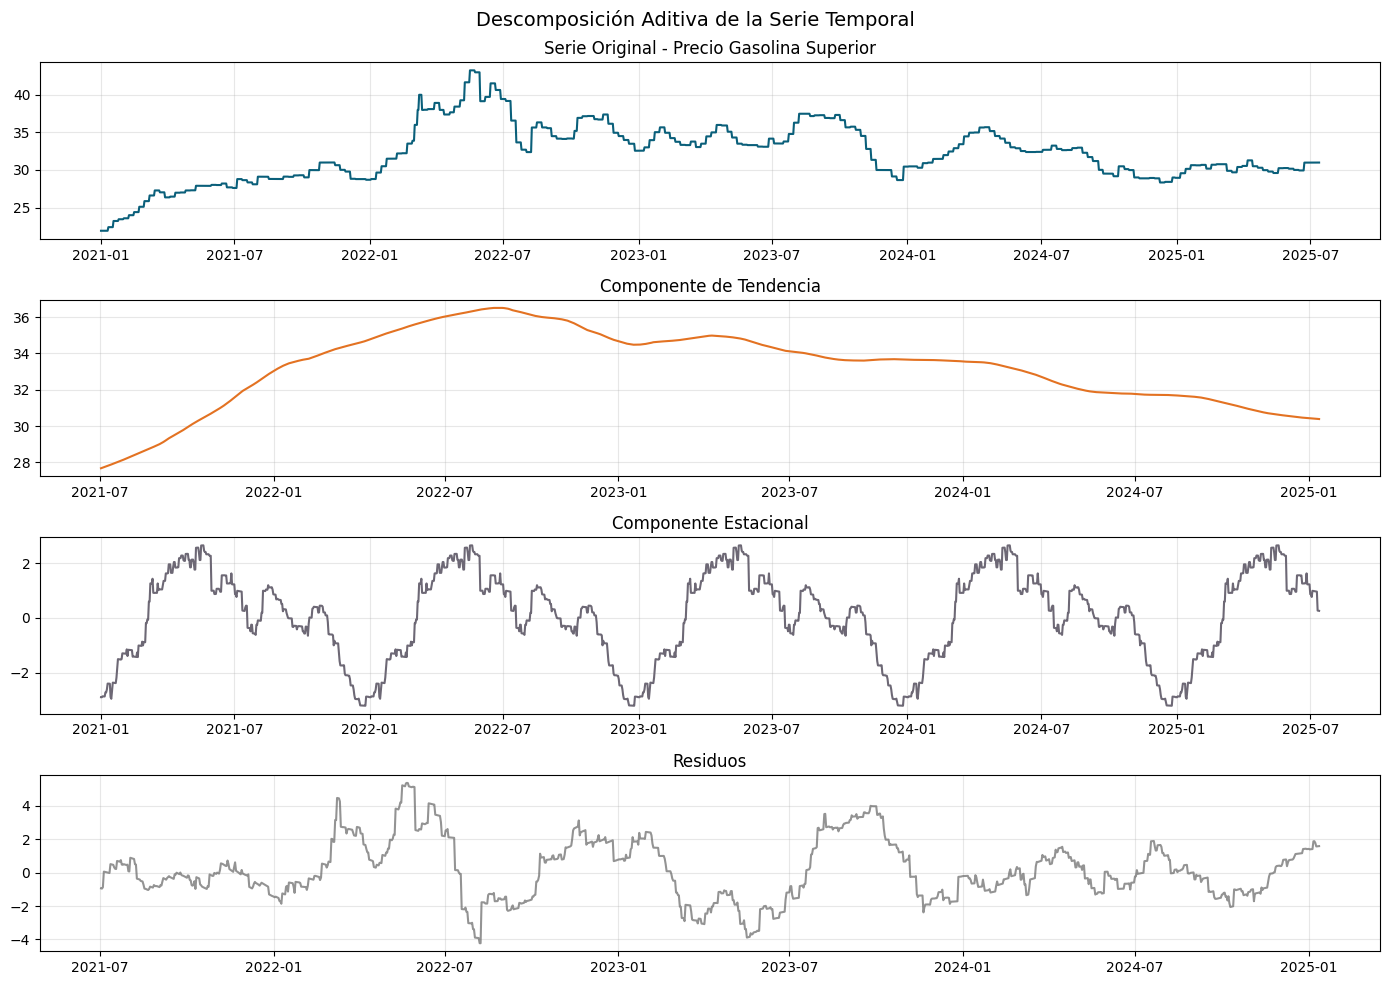

In [37]:


# Configurar la serie temporal (asegurando frecuencia diaria)
ts = df_completo.set_index('FECHA')['Superior'].asfreq('D').interpolate()

# Descomposición aditiva (modelo alternativo: multiplicative)
result = seasonal_decompose(ts, model='additive', period=365)

# Visualización mejorada
plt.figure(figsize=(14, 10))

# Serie Original
plt.subplot(4, 1, 1)
plt.plot(result.observed, color='#0A5F7A')
plt.title('Serie Original - Precio Gasolina Superior', fontsize=12)
plt.grid(alpha=0.3)

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(result.trend, color='#E37222')
plt.title('Componente de Tendencia', fontsize=12)
plt.grid(alpha=0.3)

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='#6D6875')
plt.title('Componente Estacional', fontsize=12)
plt.grid(alpha=0.3)

# Residuos
plt.subplot(4, 1, 4)
plt.plot(result.resid, color='#666666', alpha=0.7)
plt.title('Residuos', fontsize=12)
plt.grid(alpha=0.3)

plt.suptitle('Descomposición Aditiva de la Serie Temporal', fontsize=14)
plt.tight_layout()
plt.show()

## ¿Hay estacionalidad?
Sí se ve claramente que hay estacionalidad en el set de datos. La estacionalidad es de aproximadamente 1 año. La forma de la gráfica se repite cada año/cada 12 meses. 


## ¿Hay tendencia? ¿Hay problema con la varianza?

Si hay cierta tendencia, dejando del lado la época de los conflictos donde estuvieron en su mayor auge, parece que el precio de la gasolina tiende a bajar de momento. O al menos ha estado decendiendo desde los últimos 3 años, por lo que si hay una ligera tendencia por lo que podemos decir que no estacionaria respecto a la media. Con respecto a la varianza támpoco es estacionaria, claramente se ve que los picos en las observaciones no tienen el mismo tamaño y son bastante irregulares a lo largo de los últimos 5 años, aún si no se toman en cuenta los años del conflicto. 

Ta que hay tendencia es necesario hacer la función de autocorrelación y determinar cuantas diferenciaciones son necesarias (algo que luego es útil para el parámetro d del ARIMA).

## ¿Hay que hacer transoformaciones?

Sí, hay que hacer una transformación para poder estacionarizar la serie de tiempo. Estos se puede hacer con una transformación logarítmica. Nota importante, visualmente parece que la serie no es estacionaria en la media ni en la varianza. Pero con las siguientes pruebas se podrá comprobar si estoes así o si realmente la serie si es estacionaria.

Diferenciación d=0: p-value = 0.0267 → Estacionari

Número óptimo de diferenciaciones (d): 0
Prueba de Dickey-Fuller Aumentada: Serie Original
ADF Statistic             -3.097852
p-value                    0.026713
#Lags                      7.000000
#Observations           1647.000000
Critical Value (1%)       -3.434327
Critical Value (5%)       -2.863296
Critical Value (10%)      -2.567705
--------------------------------------------------
Rechazamos la hipótesis nula
La serie ES estacionaria


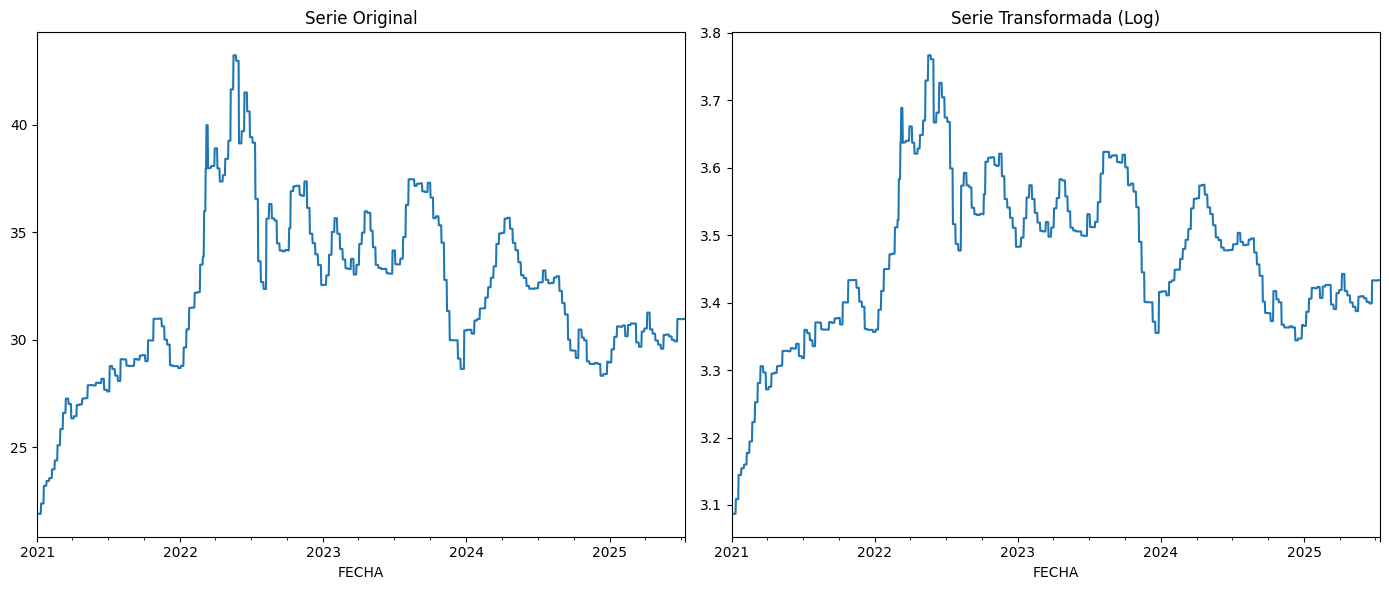

Prueba de Dickey-Fuller Aumentada: Serie Logarítmica
ADF Statistic             -3.351009
p-value                    0.012747
#Lags                      7.000000
#Observations           1647.000000
Critical Value (1%)       -3.434327
Critical Value (5%)       -2.863296
Critical Value (10%)      -2.567705
--------------------------------------------------
Rechazamos la hipótesis nula
La serie ES estacionaria
Diferenciación d=0: p-value = 0.0127 → Estacionari

Número óptimo de diferenciaciones (d): 0


In [38]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def test_adfuller(series, title=''):
    print(f'Prueba de Dickey-Fuller Aumentada: {title}')
    result = adfuller(series.dropna(), autolag='AIC')  # AIC para selección automática de lags
    
    labels = ['ADF Statistic', 'p-value', '#Lags', '#Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    
    print(out.to_string())
    print('-'*50)
    
    if result[1] <= 0.05:
        print("Rechazamos la hipótesis nula")
        print("La serie ES estacionaria")
    else:
        print("No podemos rechazar la hipótesis nula")
        print("La serie NO ES estacionaria")

from statsmodels.tsa.stattools import adfuller

def find_optimal_d(series, max_diff=2):
    for d in range(max_diff + 1):
        if d == 0:
            diff_series = series
        else:
            diff_series = series.diff(d).dropna()
        
        result = adfuller(diff_series)
        p_value = result[1]
        
        print(f'Diferenciación d={d}: p-value = {p_value:.4f}', end=' ')
        if p_value <= 0.05:
            print('→ Estacionari')
            return d
        else:
            print('→ No estacionaria')
    
    print("No se alcanzó estacionariedad con las diferenciaciones probadas")
    return None

optimal_d = find_optimal_d(ts)
print(f'\nNúmero óptimo de diferenciaciones (d): {optimal_d}')

test_adfuller(ts, 'Serie Original')
ts_log = np.log(ts)

# Visualización comparativa
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
ts.plot(title='Serie Original')
plt.subplot(1, 2, 2)
ts_log.plot(title='Serie Transformada (Log)')
plt.tight_layout()
plt.show()

# Repetir prueba ADF
test_adfuller(ts_log, 'Serie Logarítmica')

optimal_d_log = find_optimal_d(ts_log)
print(f'\nNúmero óptimo de diferenciaciones (d): {optimal_d_log}')

Realmente parece no haber mucha diferencia con la serie original a primera vista y por la prueba de Dickey-Fuller Aumentada podemos ver que en efecto la seria es estacionaria incluso antes de la transformación. Las diferenciaciones óptimas son 0 (d = 0) para el arima. Con esto podemos concluir que aunque visualmente no es estacionaria la serie, realmente la desviaciones en media y varianza resultan no ser tan significativas. Ya que incluso luego de la transformación la gráfica parece no cambiar mucho.

# Autocorrelación
Ahora para los parámetros q y p es necesario tomar en cuent al autocorrleación

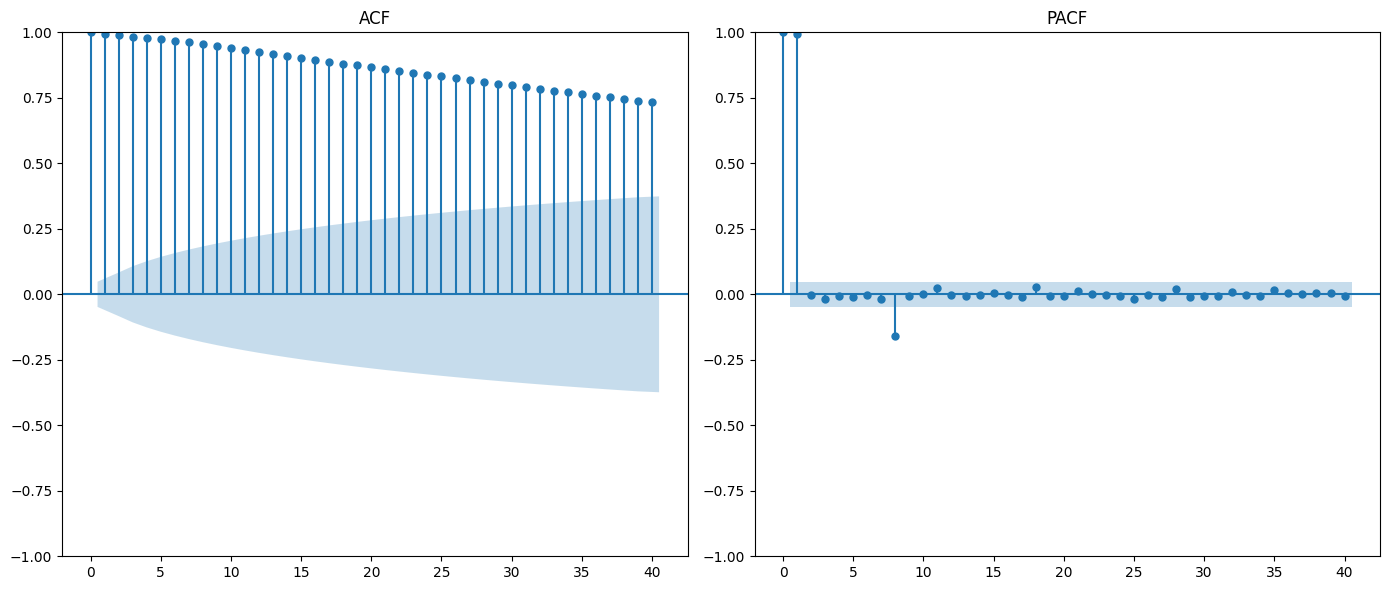

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(ts, lags=40, ax=plt.gca(), title='ACF')
plt.subplot(1, 2, 2)
plot_pacf(ts, lags=40, ax=plt.gca(), title='PACF', method='ywm')
plt.tight_layout()
plt.show()

In [40]:
from statsmodels.tsa.stattools import pacf, acf
import numpy as np

pacf_values = pacf(ts, nlags=40, method='ywm')
significant_lags = np.where(np.abs(pacf_values) > 1.96/np.sqrt(len(ts)))[0]  # 95% confianza
print("Lags significativos en PACF:", significant_lags)

# Para ACF
acf_values = acf(ts, nlags=40)
significant_lags_acf = np.where(np.abs(acf_values) > 1.96/np.sqrt(len(ts)))[0]
print("Lags significativos en ACF:", significant_lags_acf)

Lags significativos en PACF: [0 1 8]
Lags significativos en ACF: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


Aquí hay algunas interesantes que analizar. Como se puede ver en el análisis de autocorrelación en el PACF tenemos un corte brusco en el lag 1, osea el segundo lag contando desde 0. Aunque este no es el último lag, el lag 8 resulta estar mas alejado y parece ser más un outlier, seguramente algún patrón estacional causado por los conflictos. Por lo que es más segura tomar como parámetro "p" el valor de 1.

Ahora bien, en el caso del ACF tenemos un comportamiento inusual. Previamente habíamos determinado que la sería era estacionaria con la prueba de Dickey Fuller Aumentada, incluso despues de la transformación la diferencia en la serie era casi impercetible. No obstante ahora que vemos la autocorrelación se puede ver que el decaimiento es muy gradual, algo que pasa generalmente en series no estacionarias. Entonces para evaluar esto de nuevo complementamos con otro metodo, kpss de stat models.

In [41]:
# Verificar nuevamente con KPSS
from statsmodels.tsa.stattools import kpss
kpss_result = kpss(ts.dropna())
print(f"KPSS p-value: {kpss_result[1]}")

# Si p-value KPSS < 0.05 (no estacionaria), usar d=1
# Basado en ACF, probablemente sea necesario d=1 a pesar de ADF
d = 1 

KPSS p-value: 0.01


C:\Users\andre\AppData\Local\Temp\ipykernel_2932\317105366.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ts.dropna())


Viendo que el valor de la prueba KPSS es menor que 0.05, aquí si se indica que hay problema y que puede que la serie no se del todo estacionaria. Algo que se corrobora pór el gráfico de autocorrelación. Entonces para poder hacer la serie se puede probar realmente con un valor d=1 o tal vez d=0. Y ya que ACF no muestra el corte claro y decae poco a poco, podemos probar con un valor de q=0 inicialmente ya que el componente AR es mayor.


## Modelo automatico propuesto por pmdarima

In [42]:
from pmdarima import auto_arima

# Configuración básica para tu serie (ts)
modelo_auto = auto_arima(ts,
                          start_p=0, max_p=3,  # Rango para p (componente AR)
                          start_q=0, max_q=3,  # Rango para q (componente MA)
                          d=None,              # Que determine automáticamente d
                          seasonal=False,      # Sin componente estacional inicial
                          trace=False,          # Muestra progreso
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)       # Método eficiente

print(modelo_auto.summary())

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\d

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1655
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -362.413
Date:                Sun, 20 Jul 2025   AIC                            726.826
Time:                        00:48:28   BIC                            732.237
Sample:                    01-01-2021   HQIC                           728.832
                         - 07-13-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0907      0.001    140.122      0.000       0.089       0.092
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            142918.57
Prob(Q):                              0.99   Pr

El modelo sugerido es el SARIMAX(0,1,0) algo bastante similar a lo planteado previamente (1,1,0). El único valor distinto es el valor de p, el cual es 1. Teniendo 2 combinaciones de parámetros entonces ahora se puede proceder a generar los modelos.

# Preparación de datos

En este caso se nos pide es que hagamos una predicción para el año de 2025, utilizando como entrenamiento los años previos de 2024,2023 y 2022. Tomando como datos de test los registros que corresponden a lo que va del año presente, 2025.

Luego de eso hacer una predicción sobre todo el año 2025 determinando qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.



In [43]:
# aca hacer la vaina de training y testing
train = ts['2022-01-01':'2024-12-31']
test = ts['2025-01-01':]

print(f"Training: {train.shape[0]} puntos ({train.index.min()} a {train.index.max()})")
print(f"Testing: {test.shape[0]} puntos ({test.index.min()} a {test.index.max()})")


import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

Training: 1096 puntos (2022-01-01 00:00:00 a 2024-12-31 00:00:00)
Testing: 194 puntos (2025-01-01 00:00:00 a 2025-07-13 00:00:00)


## Modelo ARIMA(1,1,0)
### Entrenamiento de modelo

In [44]:
### 3 años antes y 

# ARIMA(1,1,0)
arima = ARIMA(train, order=(1,1,0)).fit()
arima_pred = arima.forecast(steps=len(test))

# Métricas
arima_aic = arima.aic
arima_bic = arima.bic
arima_rmse = np.sqrt(mean_squared_error(test, arima_pred))

print(f"ARIMA(1,1,0) - AIC: {arima_aic:.2f}, BIC: {arima_bic:.2f}, RMSE: {arima_rmse:.2f}")


ARIMA(1,1,0) - AIC: 803.85, BIC: 813.85, RMSE: 1.45


## Modelo SARIMAX(0,1,0)
### Entrenamiento de modelo

In [45]:
# SARIMAX(0,1,0)
sarima = SARIMAX(train, order=(0,1,0)).fit()
sarima_pred = sarima.forecast(steps=len(test))

# Métricas
sarima_aic = sarima.aic
sarima_bic = sarima.bic
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_pred))

print(f"SARIMAX(0,1,0) - AIC: {sarima_aic:.2f}, BIC: {sarima_bic:.2f}, RMSE: {sarima_rmse:.2f}")

SARIMAX(0,1,0) - AIC: 801.85, BIC: 806.85, RMSE: 1.45


## Modelo Holt-Winters
### Entrenamiento de modelo

In [46]:
# Holt-Winters (Triple Exponential Smoothing)
hw_model = ExponentialSmoothing(train,
                              trend='add',
                              seasonal='add',
                              seasonal_periods=365).fit()

hw_pred = hw_model.forecast(len(test))

# Métricas
hw_aic = hw_model.aic
hw_bic = hw_model.bic
hw_rmse = np.sqrt(mean_squared_error(test, hw_pred))

print(f"Holt-Winters - AIC: {hw_aic:.2f}, BIC: {hw_bic:.2f}, RMSE: {hw_rmse:.2f}")

Holt-Winters - AIC: -1949.47, BIC: -104.68, RMSE: 2.83


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Modelo Prophet y predicción sobre el tiempo conocido
### Entrenamiento de modelo

00:48:31 - cmdstanpy - INFO - Chain [1] start processing
00:48:32 - cmdstanpy - INFO - Chain [1] done processing


Prophet - RMSE: 2.27


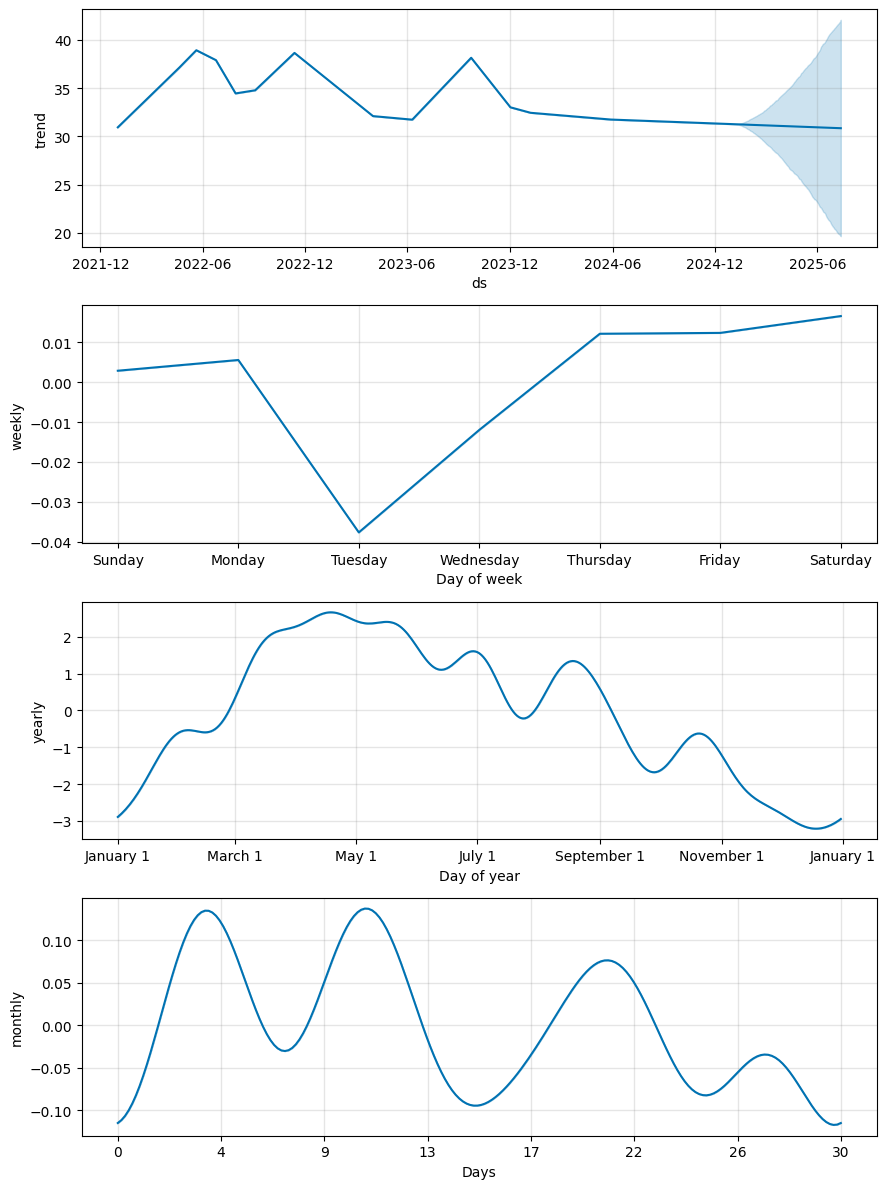

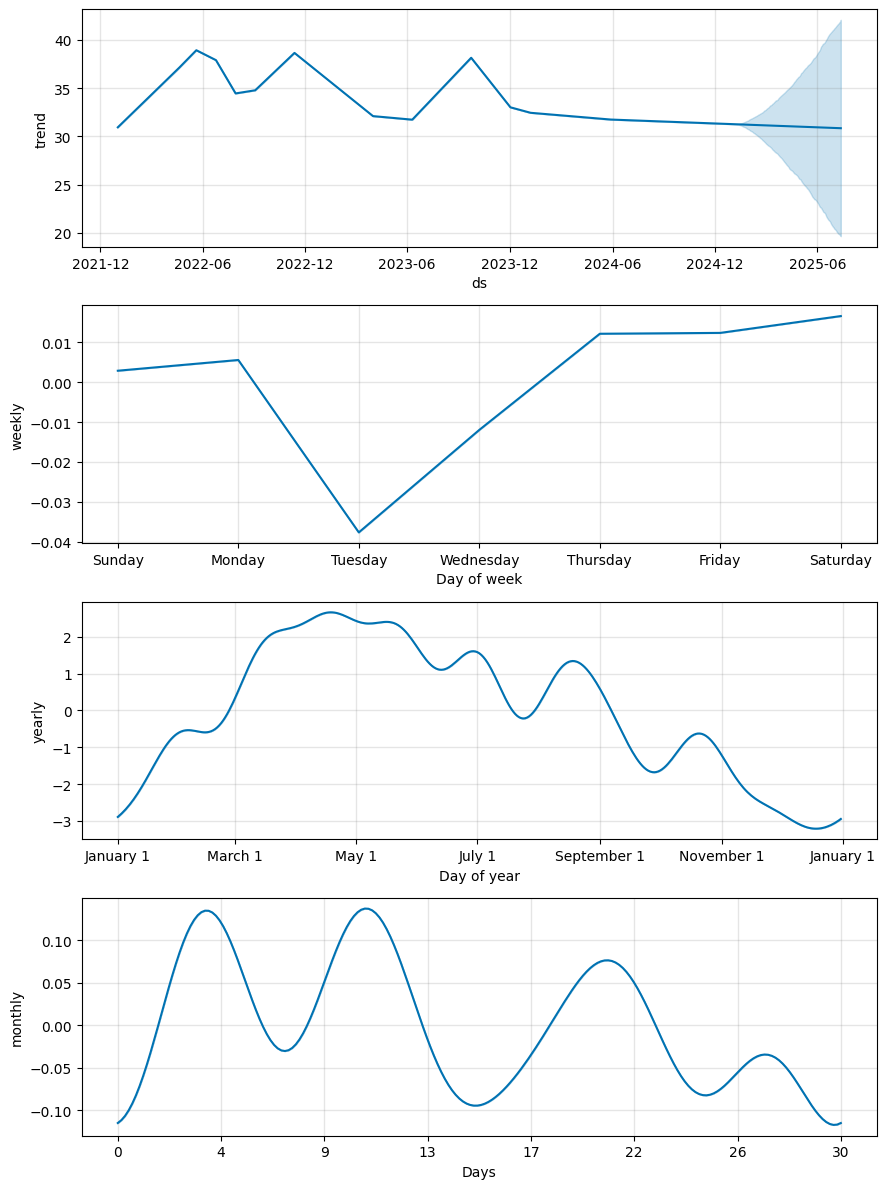

In [47]:
# Preparar datos para Prophet
prophet_df = train.reset_index()
prophet_df.columns = ['ds', 'y']

# Crear y ajustar modelo
prophet_model = Prophet(daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(prophet_df)

# Crear dataframe futuro y predecir
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_pred = prophet_model.predict(future)['yhat'][-len(test):]

# Métricas
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_pred))
print(f"Prophet - RMSE: {prophet_rmse:.2f}")

# Gráfico de componentes
prophet_model.plot_components(prophet_model.predict(future))

## Modelo red neuronal
### Entrenamiento de modelo

In [48]:
# Preprocesamiento para red neuronal
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Crear secuencias (look_back = 7 días)
def create_dataset(data, look_back=7):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i+look_back, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_scaled)
X_test, y_test = create_dataset(test_scaled)

# Modelo de red neuronal
nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Predicciones
nn_pred_scaled = nn_model.predict(X_test)
nn_pred = scaler.inverse_transform(nn_pred_scaled.reshape(-1, 1))

# Ajustar índices para comparación
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
valid_range = test.index[8:]  # Descartamos primeros 7 días por el look_back

# Métricas
nn_rmse = np.sqrt(mean_squared_error(y_test_orig, nn_pred))
print(f"Red Neuronal - RMSE: {nn_rmse:.2f}")

Red Neuronal - RMSE: 0.21


# Comparacion de los modelos

In [49]:
results = pd.DataFrame({
    'Modelo': ['ARIMA(1,1,0)', 'SARIMAX(0,1,0)', 'Prophet', 'Holt-Winters', 'Red Neuronal'],
    'AIC': [arima_aic, sarima_aic, np.nan, hw_aic, np.nan],
    'BIC': [arima_bic, sarima_bic, np.nan, hw_bic, np.nan],
    'RMSE': [arima_rmse, sarima_rmse, prophet_rmse, hw_rmse, nn_rmse]
})

print("Comparación de Modelos:")
print(results.sort_values('RMSE'))

Comparación de Modelos:
           Modelo          AIC         BIC      RMSE
4    Red Neuronal          NaN         NaN  0.207379
0    ARIMA(1,1,0)   803.854397  813.851416  1.448607
1  SARIMAX(0,1,0)   801.854397  806.852906  1.448607
2         Prophet          NaN         NaN  2.266443
3    Holt-Winters -1949.468383 -104.681492  2.833711


## Predicción con prophet usando data del 2025

Utilizando los días que ya han tanscurrido del año para predecir el precio del resto del año.

00:52:14 - cmdstanpy - INFO - Chain [1] start processing
00:52:15 - cmdstanpy - INFO - Chain [1] done processing


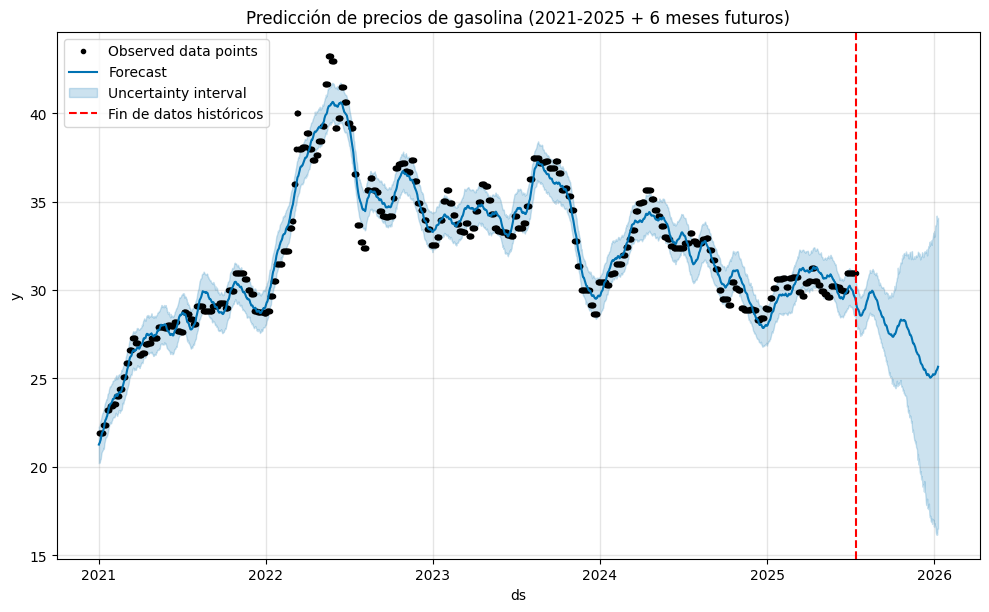

In [50]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Entrenar modelo con TODOS los datos históricos
prophet_full_df = ts.reset_index().rename(columns={'FECHA': 'ds', 'Superior': 'y'})
prophet_model = Prophet(daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(prophet_full_df)

# Predecir 180 días (6 meses) futuros
future = prophet_model.make_future_dataframe(periods=180)
forecast = prophet_model.predict(future)

# Filtrar predicciones futuras
future_predictions = forecast[forecast['ds'] > ts.index.max()][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Gráfico
fig = prophet_model.plot(forecast)
plt.title('Predicción de precios de gasolina (2021-2025 + 6 meses futuros)')
plt.axvline(x=pd.to_datetime('2025-07-13'), color='r', linestyle='--', label='Fin de datos históricos')
plt.legend()
plt.show()